In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

%matplotlib inline

# Problem 6,7,8:

In [3]:
#hold some data:
data = pd.read_csv('vocab_cs_mod.txt',sep=', ',delimiter=' ', header=None)

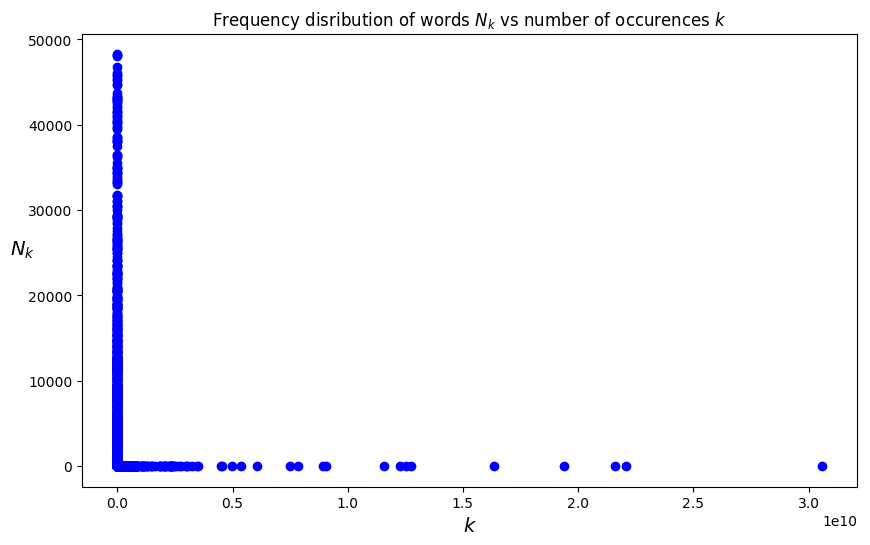

In [5]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot;
plt.title(r'Frequency disribution of words $N_k$ vs number of occurences $k$')
plt.plot(data[0],data[1],'o',color='blue')
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$N_k$', rotation='horizontal', fontsize=14)

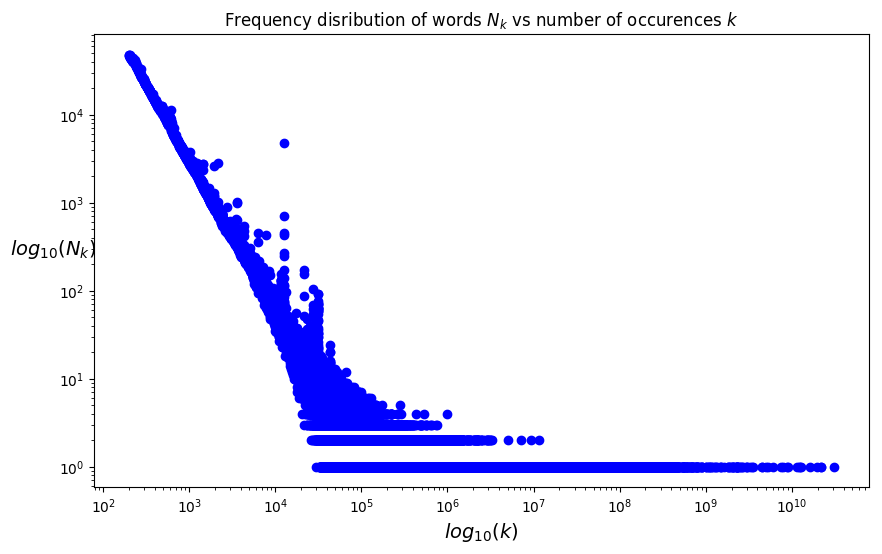

In [6]:
#plot log-log scale:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'Frequency disribution of words $N_k$ vs number of occurences $k$')
plt.loglog(data[0],data[1],'o',color='blue')
plt.xlabel(r'$log_{10}(k)$', fontsize=14)
plt.ylabel(r'$log_{10}(N_k)$', rotation='horizontal', fontsize=14)

plt.show()

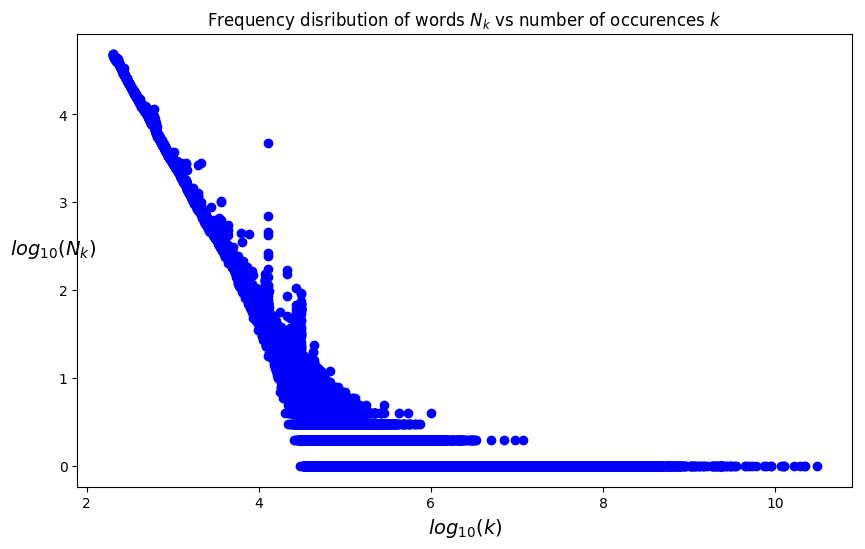

In [7]:
#plot log-log scale:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'Frequency disribution of words $N_k$ vs number of occurences $k$')
plt.plot(np.log10(data[0]),np.log10(data[1]),'o',color='blue')
plt.xlabel(r'$log_{10}(k)$', fontsize=14)
plt.ylabel(r'$log_{10}(N_k)$', rotation='horizontal', fontsize=14)

plt.show()

In [8]:
ndf = data[0]<= 10**4.3
ndf2=data[ndf]

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(ndf2[0]), np.log10(ndf2[1]))

x = np.linspace(2.25,4.5,1000)
y = slope*x +intercept

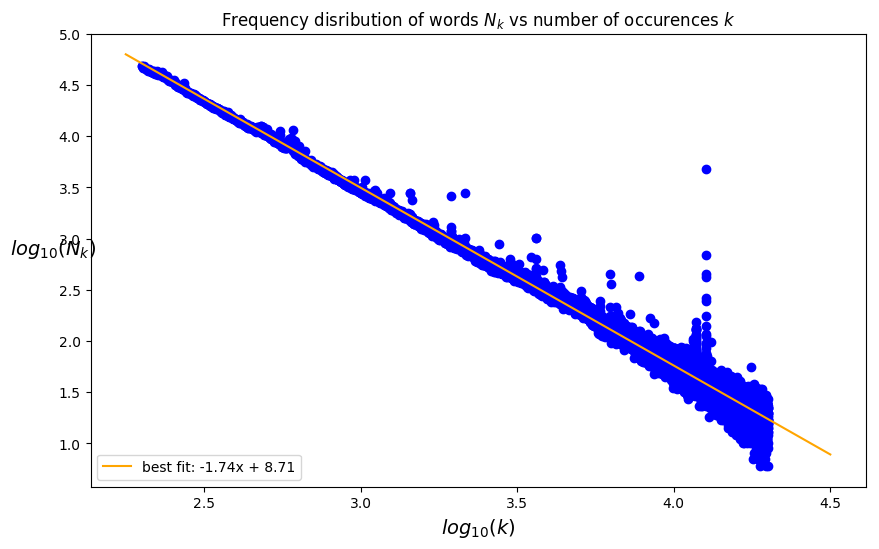

In [9]:
#plot log-log scale:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'Frequency disribution of words $N_k$ vs number of occurences $k$')
plt.plot(np.log10(ndf2[0]),np.log10(ndf2[1]),'o',color='blue',label='')
plt.plot(x,y,color='orange',label='best fit: {}x + {}'.format(round(slope,2),round(intercept,2)))
plt.xlabel(r'$log_{10}(k)$', fontsize=14)
plt.ylabel(r'$log_{10}(N_k)$', rotation='horizontal', fontsize=14)
plt.legend(loc='lower left')

plt.show()

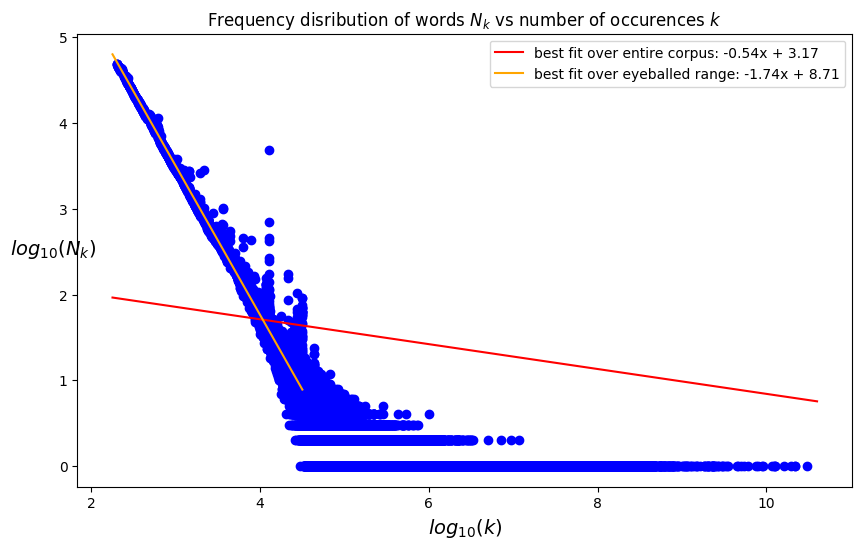

In [10]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(np.log10(data[0]), np.log10(data[1]))

x2 = np.linspace(2.25,10.6,1000)
y2 = slope2*x +intercept2

plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'Frequency disribution of words $N_k$ vs number of occurences $k$')
plt.plot(np.log10(data[0]),np.log10(data[1]),'o',color='blue',label='')
plt.plot(x2,y2,color='red',label='best fit over entire corpus: {}x + {}'.format(round(slope2,2),round(intercept2,2)))
plt.plot(x,y,color='orange',label='best fit over eyeballed range: {}x + {}'.format(round(slope,2),round(intercept,2)))
plt.xlabel(r'$log_{10}(k)$', fontsize=14)
plt.ylabel(r'$log_{10}(N_k)$', rotation='horizontal', fontsize=14)
plt.legend(loc='upper right')

plt.show()

In [ ]:
round(data[0].mean(),2)

In [ ]:
round(data[0].var(),2)

In [ ]:
round(np.log10(data[0].mean()),3)

In [ ]:
round(np.log10(data[0].var()),3)

In [ ]:
a = np.log10(data[0].min())

In [ ]:
b = np.log10(data[0].max())

In [ ]:
g = -1.74

In [ ]:
C = ((b**g)*(a**g)*(g-1))/(b*a**g - a*b**g)

In [ ]:
n_1=1
n_2=2

def E_x(a,b,C,g,n):
    return C*((a**(1+n-g)-b**(1+-g))/(g-n-1))

In [ ]:
x1 = E_x(a,b,C,g,n_1)

In [ ]:
x1=x1+8.71

In [ ]:
x2 = E_x(a,b,C,g,n_2)
x2 = x2 + 8.71 - x1**2

In [ ]:
s1 = abs(np.log10(data[0].mean()) - x1)
s1

In [ ]:
s2 = abs(np.log10(data[0].var())-x2)

In [ ]:
s2

In [ ]:
s = (g-1)*(a**2)/((g-3)*(g-2)**2)

In [ ]:
s

# Problem 9: Visualization

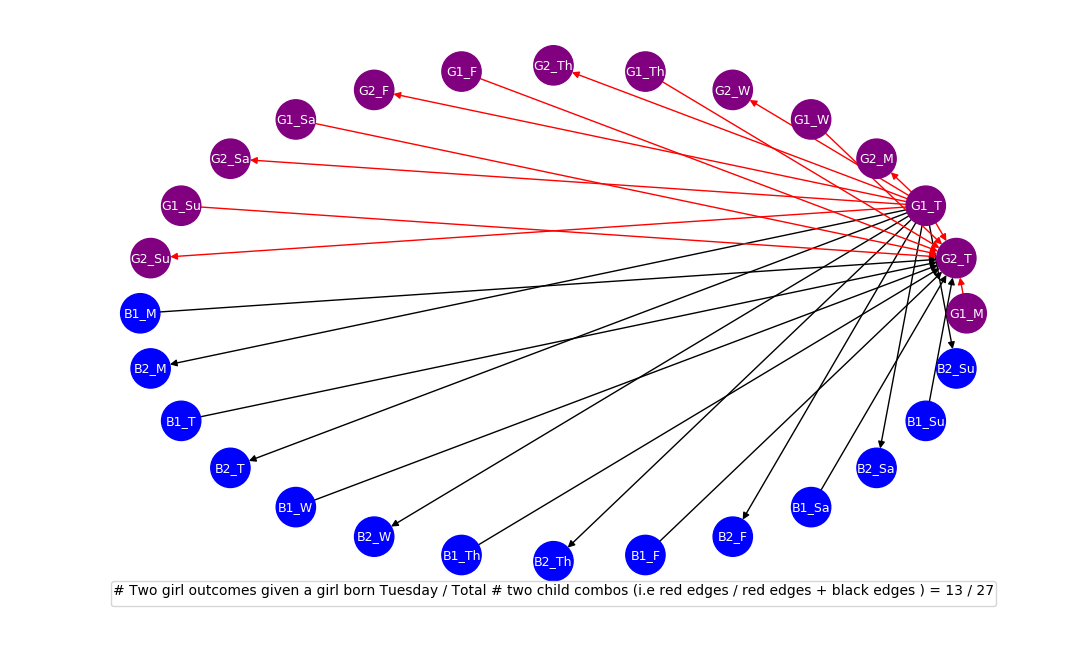

In [11]:
#Part a.

#initialize a graph:
G = nx.DiGraph()

#define the groups of outcomes:
Girls = ['G1_M', 'G2_M', 'G1_W', 'G2_W', 'G1_Th', 'G2_Th', 'G1_F', 'G2_F', 'G1_Sa', 'G2_Sa', 'G1_Su', 'G2_Su']
Boys  = ['B1_M', 'B2_M', 'B1_T', 'B2_T', 'B1_W', 'B2_W', 'B1_Th', 'B2_Th', 'B1_F', 'B2_F', 'B1_Sa', 'B2_Sa', 
         'B1_Su', 'B2_Su']

#add edges:
Edges = []

#get girl edges:
for g in Girls:
    #instance where the 1st child is a girl born on tuesday:
    if 'G2' in g:
        Edges.append(('G1_T', g))
        
    #instance where the 2nd child is a girl born on tuesday
    elif 'G1' in g:
        Edges.append((g, 'G2_T'))

#get boys:
for b in Boys:
    if 'B1' in b:
        Edges.append((b,'G2_T'))
    elif 'B2' in b:
        Edges.append(('G1_T', b))
        
#add the last case where both girls born on Tuesday:
Edges.append(('G1_T', 'G2_T'))

#get the desired outcome where the two children are girls and atleast one was born on a tuesday:
acceptable = [i for i in Edges if 'G' in i[0] and 'G' in i[1]]

#count both the total edges and the number of acceptable edges:
n_desired_outcomes = len(acceptable)
total_possible_outcomes = len(Edges)

#add edges:
G.add_edges_from(Edges)

#plot it:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
edge_colors = ['black' if not edge in acceptable else 'red'
                for edge in G.edges()]
node_colors = ['blue' if not node in Girls and node != 'G1_T' and node != 'G2_T' else 'purple' for node in G.nodes()]

#get optimal node spacing:
df = pd.DataFrame(index=G.nodes(), columns=G.nodes())
for row, data in nx.shortest_path_length(G):
    for col, dist in data.items():
        df.loc[row,col] = dist

df = df.fillna(df.max().max())
df_dict = df.to_dict()
pos = nx.kamada_kawai_layout(G, dist=df.to_dict())
#pos = nx.spectral_layout(G, weight=None, scale = 2)

nx.draw(G, pos, edge_color=edge_colors, node_color=node_colors, with_labels=True, node_size=800, font_color='white', font_size=9)
#nx.draw_networkx_labels(G, pos)

plt.legend([],title='# Two girl outcomes given a girl born Tuesday / Total # two child combos (i.e red edges / red edges + black edges ) = {} / {}'.format(n_desired_outcomes,total_possible_outcomes),
           loc = 'lower center', borderpad=0.15)
plt.show()

# Sextra Credit:

model monty hall switching vs not switching

In [12]:
#define a number of trials:
n = [i for i in range(1,100+1)]

#Distribution (Outcomes: 1 = correctly pick car, 0 = incorrectly pick goat):
doors = [0,0,1]

#function that models  staying with 1st door selection:
def stay(number_of_trials, options):
    '''STAY: given a number of trials, report the number of successfull selections. i.e, number of times a car 
             is chosen when the participant switches the initial choice.
    '''
    
    list_of_wins = [np.random.choice(options, size=i, replace=True) for i in number_of_trials]
    
    number_of_wins = []
    for i in range(len(list_of_wins)):
        number_of_wins.append(sum(list_of_wins[i]))
    
    return number_of_wins

#function that models switching to the other door:
def switch(options):
    '''SWITCH: given a number of trials, report the number of successfull selections. i.e, number of times a 
               car is chosen when the participant switches initial choice.
    '''
    
    #select a door:
    door_number = [0,1,2]
    selection = np.random.randint(3, size=1)
    
    if options[selection.item()] == 0:
        return 1
    else:
        del door_number[selection.item()]
        return options[np.random.choice(door_number, size=1, replace=True).item()]

In [13]:
stayed   = stay(n, doors)

switched = []
for i in n:
    temp = []
    for j in range(i):
        temp.append(switch(doors))
    switched.append(sum(k for k in temp))

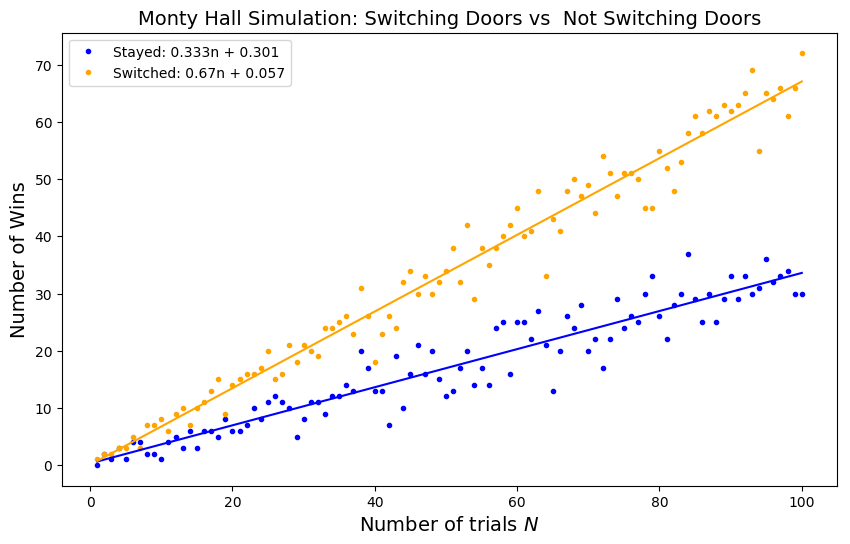

In [14]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#get the bes fits:
slope_stay, intercept_stay, r_value_stay, p_value_stay, std_err_stay = stats.linregress(n,stayed)
slope_switch, intercept_switch, r_value_switch, p_value_switch, std_err_switch = stats.linregress(n,switched)

#plot;
plt.title('Monty Hall Simulation: Switching Doors vs  Not Switching Doors', fontsize=14)
plt.plot(n, stayed,'.',color='blue', label='Stayed: {}n + {}'.format(round(slope_stay,3),round(intercept_stay,3)))
plt.plot(n, switched,'.',color='orange', label='Switched: {}n + {}'.format(round(slope_switch,3),round(intercept_switch,3)))
plt.plot(n, np.multiply(slope_stay, n) + intercept_stay, color='blue')
plt.plot(n, np.multiply(slope_switch, n) + intercept_switch, color='orange')

plt.ylabel('Number of Wins', fontsize=14)
plt.xlabel(r'Number of trials $N$', rotation='horizontal', fontsize=14)

plt.legend(loc='upper left')

plt.show()